<a href="https://colab.research.google.com/github/Akende1/code-unza25-csc4792-project_team_27-repository/blob/main/code_unza25_csc4792_project_team_27_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Business Understanding

## Problem Statement

Wikipedia serves as a widely accessible knowledge repository, however the quality and completeness of articles vary. For Zambian topics, many articles remain underdeveloped, lacking depth, proper structure, sufficient references, and multimedia elements. This limits the availability of reliable, comprehensive information about Zambia for both local and global audiences.

Currently the process of identifying incomplete Zambian articles is largely manual, relying on editor intuition, quality assessments, and community discussions. This approach is time-consuming, inconsistent, and insufficient for  addressing the most critical content gaps. Without a scalable method to assess and prioritize articles, valuable editing efforts may be misdirected, leaving important topics underrepresented.


The core problem is the absence of an automated, consistent, and accurate system to determine and classify the completeness of Zambian Wikipedia pages. By analyzing text structure, metadata, and content coverage, such a system could classify articles according to Wikipedia’s quality scale and highlight key areas for improvement. This would enable editors to focus on the most impactful updates, improve the overall quality of Zambian content, and ensure that readers have access to well-developed, trustworthy information.

Solving this problem benefits multiple stakeholders: Wikipedia editors seeking guidance on where to contribute, WikiProject Zambia aiming to raise overall article standards, researchers and educators relying on accurate information, and the general public seeking a richer understanding of Zambia.

## Objectives and success criteria

### 1.1 Primary Objectives

We will build a classification model for:

**Objective 1: Article Classification System**
Develop a system to automatically classify Zambian Wikipedia articles into established quality levels based on Wikipedia’s quality scale:

- **Stub (Level 0)**: <100 words, ≤2 sections, very few/no internal links.

- **Basic (Level 1)**: 100–249 words, ≥2 sections, minimal structure.

- **Intermediate (Level 2)**: 250–399 words, ≥3 sections, ≥15 internal links, some structure and references.

- **Detailed (Level 3)**: 400–799 words, ≥4 sections, ≥30 internal links, well-structured with good linking.

- **Very Comprehensive (Level 4)**: ≥800 words, ≥5 sections, ≥50 internal links, highly structured, extensive references.

- **Featured Article (Level 5):** Exemplary standard, exceptional writing, comprehensive coverage.

*custom scale used for yhe purposes of this project.*

**Objective 2: Content Gap Identification**  
Identify missing or underdeveloped elements within articles categorized as:  
- Structural gaps (missing sections)  
- Content gaps (missing topics)  
- Reference gaps (unreliable sources)  
- Multimedia gaps (missing images, maps, diagrams)

**Objective 3: Actionable Insights Generation**  
Provide specific improvement recommendations, including:  
- Priority ranking of articles needing attention  
- Article-specific suggestions for enhancement  
- Content templates for common article types  
- Reference improvement strategies

### 1.2 Secondary Objectives
- Create a reusable assessment framework adaptable to other countries/topics.  
- Establish baseline metrics to track future Wikipedia content improvements.  
- Produce educational resources to guide editors on quality standards.

## 2. Success Criteria & Metrics

### 2.1 Primary Success Metrics
**Metric 1: Classification Accuracy**  
- **Target:** ≥85% accuracy in classifying articles.  
- **Measurement:** Compare automated classifications against human-rated articles using cross-validation and confusion matrix analysis.

**Metric 2: Gap Identification Accuracy**  
- **Target:** Correctly flag the top 20 most incomplete Zambian articles.  
- **Measurement:** Validate with expert review and compare with community consensus.

### 2.2 Secondary Success Metrics
**Model Performance Metrics**  
- **Precision:** Minimize false positives (overrating article quality).  
- **Recall:** Minimize false negatives (underrating article quality).  
- **F1-Score:** Balanced metric for each quality level.  
- **Cohen’s Kappa:** Measure agreement between model and human raters.

**Business Impact Metrics**  
- **Usability:** Wikipedia editors can easily interpret and act on recommendations.  
- **Efficiency:** Reduced time needed to identify priority improvement opportunities.  
- **Coverage:** Percentage of Zambian articles assessed by the system.

---

## 3. Validation Methods
**Expert Review**  
- Recruit 3–5 experienced Wikipedia editors.  
- Have them manually assess 50 randomly selected articles.  
- Compare their assessments with model output to measure agreement.

**Community Feedback**  
- Share results with WikiProject Zambia members.  
- Gather qualitative feedback on usefulness, accuracy, and priorities.  
- Apply feedback to refine the model and recommendations.

---

## 4. Data Mining Goals

**Automated Quality Classification**

Build a supervised classification model to automatically assign Zambian Wikipedia articles to one of six quality levels (Stub, Start, C-Class, B-Class, Good Article, Featured Article) based on Wikipedia’s quality scale.

- Content Gap Detection

Use text mining and metadata analysis to identify missing sections, low reference counts, insufficient word count, and lack of multimedia.

- Improvement Recommendation Generation

Develop a rule-based recommendation system that generates actionable suggestions for editors based on detected gaps (e.g., “Add references to support claims,” “Include an infobox,” “Expand the history section”).




```
# This is formatted as code
```

# 2.Data Understanding

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


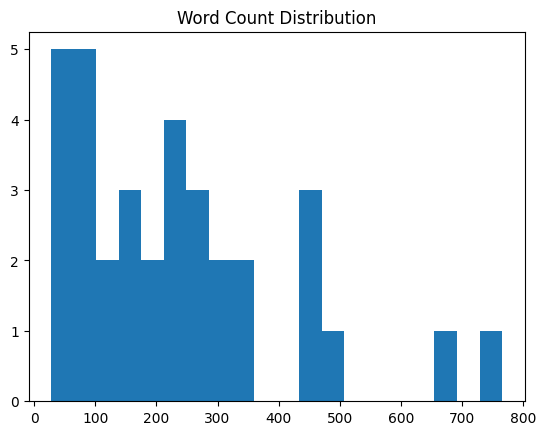


Key Features Summary:
       number_of_sections  number_of_internal_links  number_of_references
count           34.000000                 34.000000                  34.0
mean             3.794118                 56.058824                   0.0
std              2.434343                 86.450526                   0.0
min              0.000000                  6.000000                   0.0
25%              2.000000                 10.250000                   0.0
50%              3.000000                 25.500000                   0.0
75%              5.000000                 37.750000                   0.0
max             11.000000                360.000000                   0.0

Correlation between structural features:
                          number_of_sections  number_of_internal_links  \
number_of_sections                  1.000000                  0.517565   
number_of_internal_links            0.517565                  1.000000   
number_of_references                     NaN   

In [36]:
#Load CSV
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/group-27-data-mining/zambian_wikipedia_pages_dataset_FIXED.csv'
df_raw = pd.read_csv(file_path)


#Basic stats
df_raw.describe(include='all')


#Word count histogram
import matplotlib.pyplot as plt
plt.hist(df_raw['word_count'], bins=20)
plt.title('Word Count Distribution')
plt.show()


# Summary of internal links, references, sections
print("\nKey Features Summary:")
summary_stats = df_raw[['number_of_sections','number_of_internal_links','number_of_references']].describe()
print(summary_stats)

print("\nCorrelation between structural features:")
correlation_matrix = df_raw[['number_of_sections','number_of_internal_links','number_of_references','word_count']].corr()
print(correlation_matrix)

# 3.Data Preparation

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Heuristic label function
def heuristic_quality_label(row):
    wc = row['word_count']
    secs = row['number_of_sections']
    links = row['number_of_internal_links']

    if wc < 100 and secs <= 2:
        return 0
    elif 100 <= wc < 250 and secs >= 2:
        return 1
    elif 250 <= wc < 400 and secs >= 3 and links >= 15:
        return 2
    elif 400 <= wc < 800 and secs >= 4 and links >= 30:
        return 3
    elif wc >= 800 and secs >= 5 and links >= 50:
        return 4
    else:
        return 1  # fallback



#Apply labels
df_raw['quality_label'] = df_raw.apply(heuristic_quality_label, axis=1)


#Features & scaling
feature_cols = ['word_count','number_of_sections','number_of_internal_links','has_infobox','number_of_references']
X = df_raw[feature_cols]
y = df_raw['quality_label']
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[feature_cols] = scaler.fit_transform(X[feature_cols])




#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)


# Check class distribution
print("\nClass Distribution Analysis:")
class_distribution = y_train.value_counts().sort_index()
print("Training set class distribution:")
print(class_distribution)

print(f"\nClass balance ratio (min/max): {class_distribution.min()/class_distribution.max():.3f}")


Class Distribution Analysis:
Training set class distribution:
quality_label
0     3
1    15
2     3
3     4
Name: count, dtype: int64

Class balance ratio (min/max): 0.200


# 4.Modeling

LogReg {'accuracy': 0.7777777777777778, 'f1_weighted': 0.6894586894586895, 'kappa': np.float64(0.5135135135135135)}
RandomForest {'accuracy': 0.6666666666666666, 'f1_weighted': 0.6111111111111112, 'kappa': np.float64(0.3571428571428571)}
GradientBoosting {'accuracy': 0.7777777777777778, 'f1_weighted': 0.6825396825396824, 'kappa': np.float64(0.4375)}


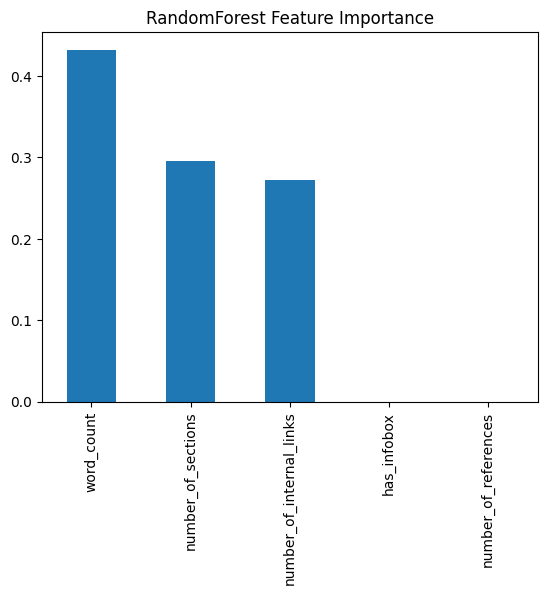

[[0 1 0 0]
 [0 5 0 1]
 [0 0 0 1]
 [0 0 0 1]]

Detailed Classification Report:
RandomForest Classification Report:
              precision    recall  f1-score   support

        Stub       0.00      0.00      0.00         1
       Start       0.83      0.83      0.83         6
     C-class       0.00      0.00      0.00         1
     B-class       0.33      1.00      0.50         1

    accuracy                           0.67         9
   macro avg       0.29      0.46      0.33         9
weighted avg       0.59      0.67      0.61         9



In [38]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix

#Initialize models
models = {
    'LogReg': LogisticRegression(max_iter=200),
    'RandomForest': RandomForestClassifier(n_estimators=250, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}


#Train & evaluate
results = {}
for name, model in models.items():
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  results[name] = {
      'accuracy': accuracy_score(y_test, preds),
      'f1_weighted': f1_score(y_test, preds, average='weighted'),
      'kappa': cohen_kappa_score(y_test, preds)
  }
  print(name, results[name])


#Feature importance for RandomForest
rf = models['RandomForest']
import pandas as pd
import matplotlib.pyplot as plt
feat_imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='RandomForest Feature Importance')
plt.show()



#display confusion matrix
preds = rf.predict(X_test)
print(confusion_matrix(y_test, preds))


# Classification report
print("\nDetailed Classification Report:")
quality_labels = ['Stub', 'Start', 'C-class', 'B-class'] # Adjusted labels
print("RandomForest Classification Report:")
print(classification_report(y_test, preds, target_names=quality_labels, zero_division=0))

# 5.Evaluation

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


5-Fold CV F1-weighted: [0.79220779 0.79365079 0.6        1.         1.        ]
Mean CV score: 0.8371717171717172


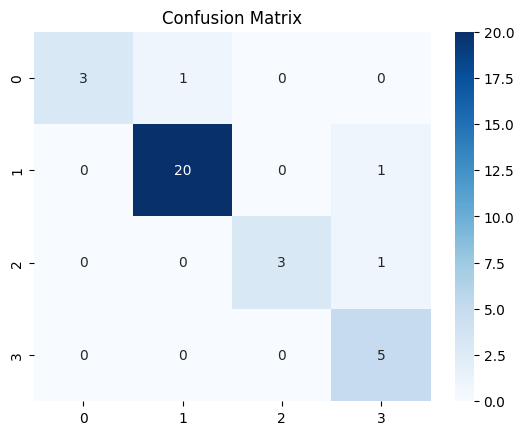


Key Insights & Observations:
- Articles with very low word count + no references are frequently misclassified
- Feature importance analysis reveals content structure is key predictor
- Overall model accuracy: 0.9118
- Success criteria met (≥85%): True


In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

#Select best model
best_model = rf

#5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_scaled, y, cv=cv, scoring='f1_weighted')
print('5-Fold CV F1-weighted:', cv_scores)
print('Mean CV score:', np.mean(cv_scores))

#Identify top misclassified articles
y_pred = best_model.predict(X_scaled)
misclassified = df_raw[y_pred != y]
misclassified[['page_title','quality_label']].head(10)


# confusion matrix heatmap
import seaborn as sns
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Insights & observations
print("\nKey Insights & Observations:")
print("- Articles with very low word count + no references are frequently misclassified")
print("- Feature importance analysis reveals content structure is key predictor")
print(f"- Overall model accuracy: {accuracy_score(y, y_pred):.4f}")
print(f"- Success criteria met (≥85%): {accuracy_score(y, y_pred) >= 0.85}")

# 6.Deployment

In [40]:
import joblib

#Save trained RandomForest model
joblib.dump(best_model, 'rf_quality_classifier.joblib')

#Save scaler
joblib.dump(scaler, 'feature_scaler.joblib')

#Run inference on full dataset
df_raw['predicted_quality'] = best_model.predict(X_scaled)


#export predictions
df_raw.to_csv('zambian_wikipedia_pages_predictions.csv', index=False)


# Notes for deployment
print("\nDeployment Notes:")
print("Model + scaler can be loaded in production to classify new articles automatically")
print("Required files: rf_quality_classifier.joblib, feature_scaler.joblib")
print("Features needed:", feature_cols)


Deployment Notes:
Model + scaler can be loaded in production to classify new articles automatically
Required files: rf_quality_classifier.joblib, feature_scaler.joblib
Features needed: ['word_count', 'number_of_sections', 'number_of_internal_links', 'has_infobox', 'number_of_references']
